- 1    Получить данные с url http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html с помщью своего скрапера и сохранить в .csv
- 2    Провести анализ зависимости роста и веса с помощью pandas. 
- 3    В качестве шаблона используйте lab08 на Я.диске

In [121]:
import bs4
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import csv


filename = 'data.csv'
f = open(filename,'w',newline = '')
data = csv.writer(f)

html = urlopen('http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html')
bsobj = soup(html.read())
tbody = bsobj('table')[0].findAll('tr')
tmp = []

for row in tbody:
    cols = row.findChildren(recursive = False)
    cols = [element.text.strip() for element in cols]
    data.writerow(cols) 
    tmp.append(cols)


In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
data = pd.read_csv("data.csv")
data = data.rename(columns={'Height(Inches)' : "Height"})
data = data.rename(columns={'Weight(Pounds)' : "Weight"})
del data['Index']

In [124]:
data['Height'] *= 2.54
data['Weight'] /= 2.205
data = data.round(1)

data.head(-5)

,Height,Weight
0,167.1,51.2
1,181.6,61.9
2,176.3,69.4
3,173.3,64.6
4,172.2,65.4
...,...,...
24990,177.7,56.9
24991,182.7,58.2
24992,180.2,66.3
24993,168.1,53.9


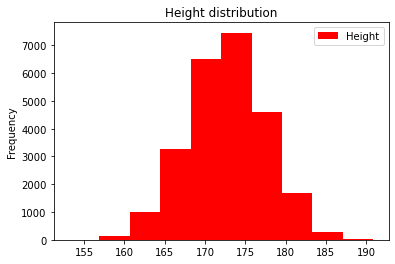

In [125]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height distribution')
plt.show()

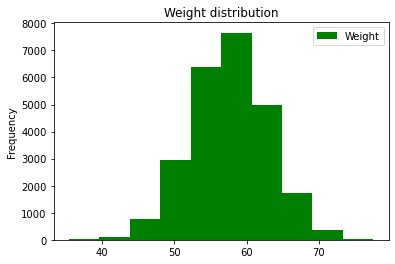

In [126]:
data.plot(y='Weight', kind='hist', color='green',  title='Weight distribution')
plt.show()

In [127]:
def make_bmi(height, weight):
    return (weight) / (height/100) ** 2

In [128]:
df['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)


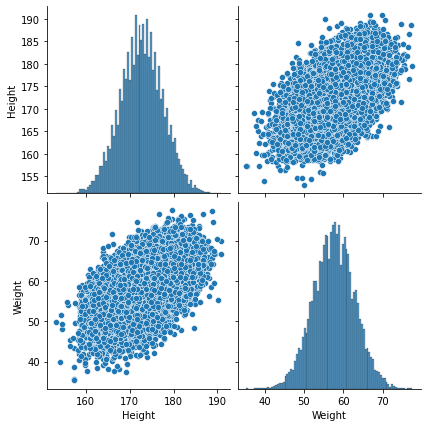

In [129]:
sns.pairplot(data, height=3)
plt.show()

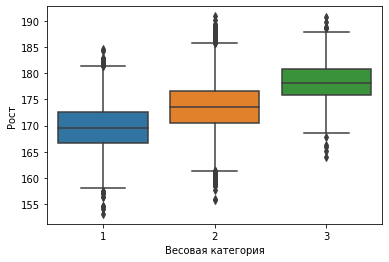

In [137]:
def weight_category(weight):
    if weight < 54:
        return 1
    elif weight >= 68:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
dataBoxplot = sns.boxplot(x='weight_cat', y='Height', data=data)
dataBoxplot.set(xlabel=u'Весовая категория', ylabel=u'Рост')
plt.show()

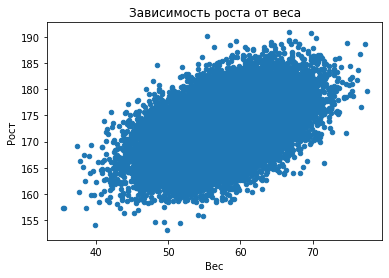

In [138]:
dataPlot = data.plot(x='Weight', y='Height', kind='scatter', title=u'Зависимость роста от веса')
dataPlot.set(xlabel=u'Вес', ylabel=u'Рост')
plt.show()

In [139]:
def squaredError(w0, w1):
    rData, cData = data.shape
    error = np.zeros( rData )
    error = (data['Height'] - (w0 + w1 * data['Weight'])) ** 2
    return error.sum()

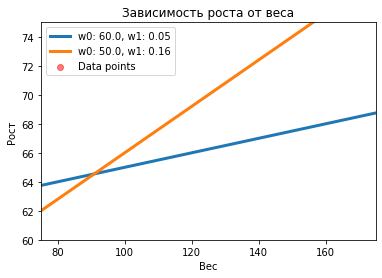

In [140]:
lineFunc = lambda x, w0, w1: w0 + w1 * x

#массив точек по оси X
pointsNum = 100
xLines = np.linspace(0, 200, pointsNum)

#массив значений коэффициентов прямых
wLine = np.array( [[60., 0.05], [50, 0.16]] )
rwLine, cwLine = wLine.shape

#массив точек по оси Y
yLines = np.zeros( (rwLine, pointsNum) )
for i in range(rwLine):
    yLines[i] = np.array( lineFunc(xLines, wLine[i, 0], wLine[i, 1]) )
    
#построение графиков
plt.scatter(data['Weight'], data['Height'], alpha=0.5, c='red', label='Data points')
for i in range(rwLine):
    text = 'w0: ' + str(wLine[i, 0]) + ', w1: ' + str(wLine[i, 1])
    plt.plot(xLines, yLines[i], linewidth=3.0, label=text)

plt.legend()
plt.axis( [75, 175, 60, 75] )
plt.title(u'Зависимость роста от веса')
plt.xlabel(u'Вес')
plt.ylabel(u'Рост')
    
plt.show()

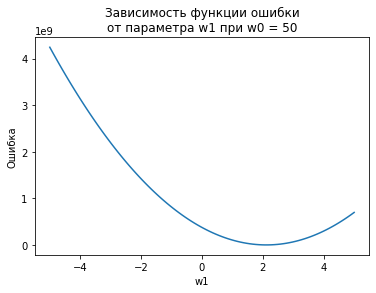

In [141]:
#изменяем параметр w1
numw1Iter = 100
w1Iter = np.linspace(-5., 5., numw1Iter)

#ошибка для каждого w1
errw1Iter = np.zeros( (numw1Iter) )
for i in range(numw1Iter):
    errw1Iter[i] = squaredError(50., w1Iter[i])
    
#построение графика
plt.plot(w1Iter, errw1Iter)

plt.title(u'Зависимость функции ошибки\nот параметра w1 при w0 = 50')
plt.xlabel(u'w1')
plt.ylabel(u'Ошибка')
    
plt.show()

In [142]:
from scipy.optimize import minimize_scalar

optw1Res = minimize_scalar(lambda w: squaredError(50., w), bounds=(-5, 5))
optw1 = optw1Res.x
print ('Optimal w1 value for w0 = 50:', round(optw1, 3))

Optimal w1 value for w0 = 50: 2.115


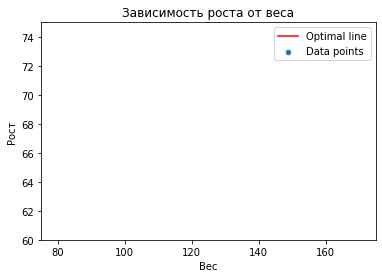

In [136]:
#значения линейной аппроксимации для оптимального значения w1
yLinesOpt = np.array( lineFunc(xLines, 50., optw1) )

#построение графиков
dataPlot = data.plot(x='Weight', y='Height', kind='scatter', title=u'Зависимость роста от веса', label=u'Data points')
dataPlot.set(xlabel=u'Вес', ylabel=u'Рост')

plt.plot(xLines, yLinesOpt, c='red', label=u'Optimal line')

plt.legend()
plt.axis( [75, 175, 60, 75] )
plt.title(u'Зависимость роста от веса')
plt.xlabel(u'Вес')
plt.ylabel(u'Рост')
    
plt.show()
